# Cyclistic Bike-Sharing Analysis



## Pendahuluan
***

### The Cyclistic Company

Cyclistic adalah perusahaan bike-sharing di Chicago, Amerika Serikat yang memiliki lebih dari 5.800 sepeda dan 600 stasiun dok. Cyclistic membedakan dirinya dengan menawarkan sepeda yang dapat direbahkan, sepeda roda tiga, dan sepeda kargo, sehingga membuat bike-sharing lebih inklusif bagi penyandang disabilitas dan pengendara yang tidak dapat menggunakan sepeda roda dua standar. Pengguna Cyclistic lebih cenderung bersepeda untuk bersantai, tetapi mereka juga menggunakannya untuk pergi ke tempat kerja setiap hari.

Hingga saat ini, strategi pemasaran Cyclistic bergantung pada membangun kesadaran umum dan menarik segmen konsumen yang luas.
Salah satu pendekatan yang membantu mewujudkan hal ini adalah fleksibilitas paket harga: tiket sekali jalan, tiket sehari penuh, dan keanggotaan tahunan. Pelanggan yang membeli tiket sekali jalan atau tiket sehari penuh disebut sebagai pengendara biasa. Pelanggan yang membeli keanggotaan tahunan disebut sebagai anggota Cyclistic.

Meskipun fleksibilitas harga membantu Cyclistic menarik lebih banyak pelanggan, Cyclistic percaya bahwa memaksimalkan jumlah anggota tahunan akan menjadi kunci pertumbuhan di masa depan. Daripada membuat kampanye pemasaran yang menargetkan pelanggan baru, Cyclistic percaya bahwa ada peluang yang sangat bagus untuk mengubah pengendara biasa menjadi anggota.


### Permasalahannya

Mengubah pengendara biasa menjadi anggota Cyclistic.

### Tugas Bisnis

- Menganalisis bagaimana pengendara biasa dan anggota tahunan berperilaku berbeda.
- Mendukung para pemangku kepentingan untuk membuat pengambilan keputusan berdasarkan data untuk menciptakan kampanye atau strategi yang berusaha mengubah pengendara biasa menjadi anggota Cyclistic.

## The Dataset
---

Kami akan menggunakan data perjalanan historis Cyclistic untuk menganalisis dan mengidentifikasi tren. Kumpulan data dapat diunduh [di sini](https://divvy-tripdata.s3.amazonaws.com/index.html).

Data tersebut telah disediakan oleh Motivate International Inc. di bawah [lisensi] ini (https://www.divvybikes.com/data-license-agreement).

Dataset yang kami gunakan mencakup 1 tahun pengamatan, dari Oktober 2021 hingga September 2022.

| Columns | Description |
| :- | :- |
| ride_id | id for this ride |
| rideable_type | type of bike being ride |
| started_at | date and time the bike is started to use |
| ended_at | date and time the bike is finished to use |
| start_station_name | name of the ride starting station |
| start_station_id | id of the ride starting station |
| end_station_name | name of the ride ending station |
| end_station_id | id of the ride ending station |
| start_lat | latitude coordinate of the ride starting station |
| start_lng | longitude coordinate of the ride starting station |
| end_lat | latitude coordinate of the ride ending station |
| end_lng | longitude coordinate of the ride ending station |
| member_casual | membership type; `casual` for casual rider or `member` for annual membership rider |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import datetime
import calendar

import glob

import warnings
warnings.filterwarnings("ignore")

## Load the Data
---

Impor dan gabungkan semua set data menggunakan `glob`

In [ ]:
trip_files = glob.glob("/content/drive/MyDrive/Dataset_Divvy/202***-divvy-tripdata.csv")
df_list = []
for filename in trip_files:
    data = pd.read_csv(filename)
    df_list.append(data)

df = pd.concat(df_list).reset_index()
df = df.drop(['index'], axis=1)

## Data Overview
---

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [ ]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 5667717


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


### Check for Missing Values

In [ ]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [ ]:
percent_null = df.isnull().sum() * 100 / len(df)

In [ ]:
print(round(percent_null, 2))

ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_station_name    14.70
start_station_id      14.70
end_station_name      15.75
end_station_id        15.75
start_lat              0.00
start_lng              0.00
end_lat                0.10
end_lng                0.10
member_casual          0.00
dtype: float64


Kolom `start_station_name`, `start_station_id`, `end_station_name`, dan `end_station_id` memiliki nilai yang hilang cukup banyak, yaitu lebih dari 15%. Ada juga beberapa nilai yang hilang pada `end_lat` dan `end_lng`, meskipun jauh lebih kecil, yaitu 0,1%.

### Handle Missing Values

In [ ]:
df_raw = df.copy()

Meskipun persentase nilai yang hilang pada kolom stasiun cukup tinggi, kita akan mengabaikan kolom-kolom ini karena kita tidak akan menggunakannya dalam analisis kita.

In [ ]:
drop_col = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']
df = df.drop(drop_col, axis=1)

In [ ]:
# fill missing data with mode
df['end_lat'].fillna(df['end_lat'].mode()[0], inplace=True)
df['end_lng'].fillna(df['end_lng'].mode()[0], inplace=True)

In [ ]:
percent_null_new = df.isnull().sum() * 100 / len(df)

In [ ]:
print(round(percent_null_new, 2))

ride_id          0.0
rideable_type    0.0
started_at       0.0
ended_at         0.0
start_lat        0.0
start_lng        0.0
end_lat          0.0
end_lng          0.0
member_casual    0.0
dtype: float64


### Check Duplicated Values

In [ ]:
df.duplicated().value_counts()

False    5667717
dtype: int64

Tidak ada nilai yang terduplikasi dalam dataset kami

### Statistical Summary

Karena satu-satunya label numerik dalam dataset kami adalah koordinat lokasi yang tidak dapat diringkas dalam nilai statistik, kami hanya akan melihat ringkasan statistik label kategorikal.

In [ ]:
# separate the object column
cat_col = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)

In [ ]:
df[cat_col].describe()

,ride_id,rideable_type,started_at,ended_at,member_casual
count,5667717,5667717,5667717,5667717,5667717
unique,5667717,3,4745862,4758633,2
top,C2F7DD78E82EC875,electric_bike,2022-05-30 13:05:15,2022-08-22 12:47:49,member
freq,1,2889029,9,20,3345685


- Ada 3 jenis rideable_type atau jenis sepeda, di mana jenis yang paling banyak digunakan adalah electric_bike atau sepeda listrik.
- Sebagian besar pelanggan kami membeli keanggotaan tahunan atau member.

## Data Analysis and Visualization
---
### Jumlah perjalanan berdasarkan jenis sepeda

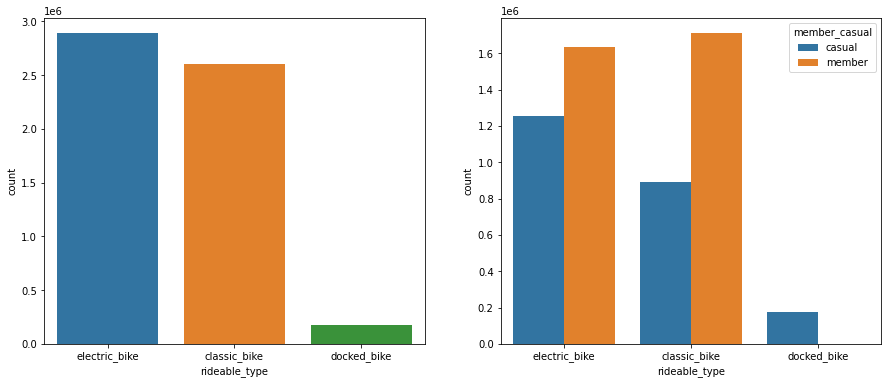

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0] = sns.countplot(ax=axes[0], x='rideable_type', data=df)
axes[1] = sns.countplot(ax=axes[1], x='rideable_type', data=df, hue='member_casual')
plt.show()

In [ ]:
bike_count = df.groupby('rideable_type', as_index=False)['ride_id'].count()
bike_count = bike_count.rename(columns = {'ride_id' : 'ride_count'})
bike_count

,rideable_type,ride_count
0,classic_bike,2601214
1,docked_bike,177474
2,electric_bike,2889029


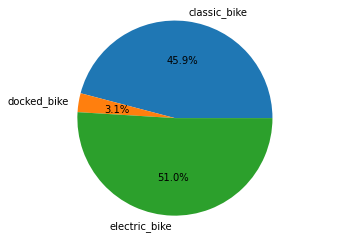

In [ ]:
bike_type = ['classic_bike', 'docked_bike', 'electric_bike']
ride_num = bike_count.ride_count

plt.pie(ride_num, labels=bike_type, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

- Sepeda listrik adalah jenis sepeda yang paling banyak digunakan di semua perjalanan, mencapai hampir setengah dari total perjalanan.
- Pengendara anggota lebih banyak menggunakan sepeda klasik daripada sepeda listrik. Sebaliknya, pengendara umum atau kasual lebih banyak menggunakan sepeda listrik daripada sepeda klasik.

### Jumlah perjalanan berdasarkan jenis keanggotaan

In [ ]:
member_count = df.groupby('member_casual', as_index=False)['ride_id'].count()
member_count = member_count.rename(columns = {'ride_id' : 'ride_count'})
member_count

,member_casual,ride_count
0,casual,2322032
1,member,3345685


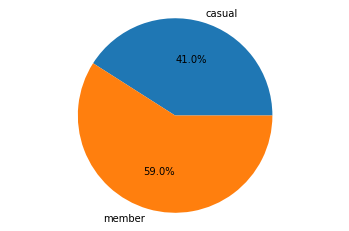

In [ ]:
member_type = ['casual', 'member']
ride_num = member_count.ride_count

plt.pie(ride_num, labels=member_type, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

Sebanyak 59% dari pengendara yang menggunakan sepeda ini adalah anggota, sementara 41% sisanya adalah pengendara biasa.

### Analisis Kolom Tanggal dan Waktu

Pada dataset kami, kolom `started_at` dan `ended_at` berisi informasi tentang tanggal dan waktu sepeda digunakan dan dikembalikan. Ada banyak informasi yang dapat kita ambil dari kolom ini. Dengan menggunakan kolom-kolom tersebut, kita akan membuat kolom-kolom baru di bawah ini:
- Bulan perjalanan
- Musim perjalanan
- Hari perjalanan
- Waktu/jam perjalanan
- Lama perjalanan (dalam menit)

In [ ]:
# check present column before new columns are created
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665967,42.01256,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,41.92533,-87.665800,member


In [ ]:
# convert `started_at` and `ended_at` columns to datetime data type
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 389.2+ MB


In [ ]:
# create the month column
df['month'] =df['started_at'].dt.month_name()

In [ ]:
# create the season column
def find_season(month):
    season_month = {
            'December':'Winter', 'January':'Winter', 'February':'Winter',
            'March':'Spring', 'April':'Spring', 'May':'Spring',
            'June':'Summer', 'July':'Summer', 'August':'Summer',
            'September':'Autumn', 'October':'Autumn', 'November':'Autumn'}
    return season_month.get(month)

season_list = []

for month in df['month']:
    season = find_season(month)
    season_list.append(season)

df['season'] = season_list

In [ ]:
# create the day_of_week column
df['day_of_week'] = df['started_at'].dt.day_name()

In [ ]:
# create hour time of the ride 
df['time_hour'] = df['started_at'].dt.hour

In [ ]:
# create ride duration of the ride
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [ ]:
# check statistical summary of ride_duration column
df['ride_duration'].describe()

count    5.667717e+06
mean     1.944329e+01
std      1.761281e+02
min     -1.035335e+04
25%      5.816667e+00
50%      1.028333e+01
75%      1.846667e+01
max      4.138725e+04
Name: ride_duration, dtype: float64

In [ ]:
df[df['ride_duration'] < 0].count()

ride_id          100
rideable_type    100
started_at       100
ended_at         100
start_lat        100
start_lng        100
end_lat          100
end_lng          100
member_casual    100
month            100
season           100
day_of_week      100
time_hour        100
ride_duration    100
dtype: int64

Setelah membuat kolom `ride_duration`, kami melihat ada beberapa durasi yang berada di bawah 0 menit. Karena nilai ini tidak masuk akal, kita akan menyesuaikan pengamatan dengan durasi perjalanan di atas 0 detik.

In [ ]:
df = df[df['ride_duration'] > 0]

Setelah membuat beberapa kolom baru, dataset kita sekarang akan terlihat seperti ini:

In [ ]:
# check present column after new columns are created
df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,month,season,day_of_week,time_hour,ride_duration
5268559,8A89D09015BEDC2C,classic_bike,2022-09-16 18:17:09,2022-09-16 18:27:49,41.890762,-87.631697,41.883181,-87.648725,casual,September,Autumn,Friday,18,10.666667
4459569,08B61DD68A7AFE59,classic_bike,2022-11-15 05:54:46,2022-11-15 05:58:51,41.902309,-87.627691,41.896945,-87.621758,member,November,Autumn,Tuesday,5,4.083333
4191890,B5220D585382BB8B,classic_bike,2022-10-09 21:15:11,2022-10-09 21:33:53,41.883602,-87.648627,41.894666,-87.638437,member,October,Autumn,Sunday,21,18.700000
3642247,591C7FA7C5D92C1F,electric_bike,2022-08-13 19:10:17,2022-08-13 19:23:18,41.920000,-87.680000,41.922167,-87.638888,casual,August,Summer,Saturday,19,13.016667
1742318,60EF792AF0EF41E5,electric_bike,2022-06-17 13:57:19,2022-06-17 14:14:07,42.019098,-87.673537,42.015963,-87.675005,casual,June,Summer,Friday,13,16.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667186 entries, 0 to 5667716
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
 9   month          object        
 10  season         object        
 11  day_of_week    object        
 12  time_hour      int64         
 13  ride_duration  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 648.6+ MB


Mari kita lanjutkan analisis kita.

### Jumlah perjalanan per bulan

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

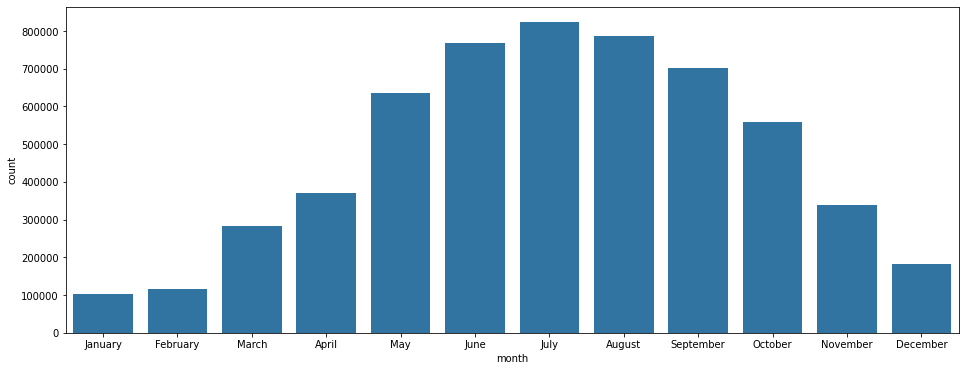

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='month', data=df, order=month_order, color='tab:blue')
plt.show()

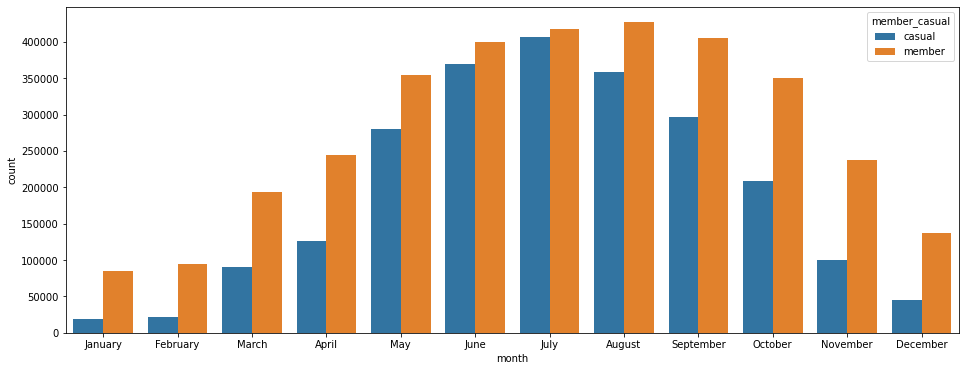

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='month', data=df, order=month_order, hue='member_casual')
plt.show()

- Mulai dari bulan Mei, jumlah perjalanan mulai meningkat dan mencapai puncaknya pada bulan July.
- Jumlah Perjalanan tertinggi terjadi pada bulan Juni, Juli, dan Agustus. Pada bulan-bulan ini, musim panas sedang berlangsung.
- Jumlah Perjalanan terendah terjadi pada bulan Januari, Februari, dan Desember, yang merupakan bulan-bulan musim dingin.
- Jumlah pengendara anggota selalu lebih tinggi daripada pengendara biasa di semua bulan sepanjang tahun. Namun pada bulan Juli, jumlah pengendara kasual meningkat secara signifikan dan hampir sama dengan pengendara anggota.

### Jumlah wahana berdasarkan musim

In [ ]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

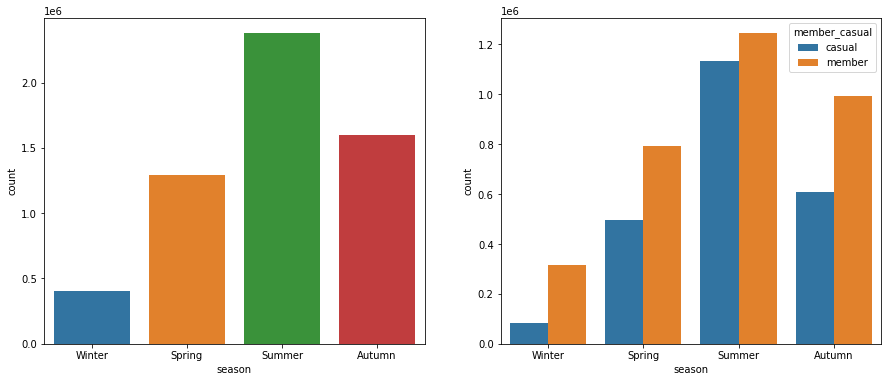

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0] = sns.countplot(ax=axes[0], x='season', order=season_order, data=df)
axes[1] = sns.countplot(ax=axes[1], x='season', order=season_order, data=df, hue='member_casual')
plt.show()

- Berdasarkan musim, jumlah Perjalanan paling tinggi selama musim panas atau Summer.
- Hal ini kemungkinan besar dikontribusikan oleh tingginya peningkatan jumlah pengendara kasual selama musim panas.

### Jumlah perjalanan berdasarkan hari dalam seminggu

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

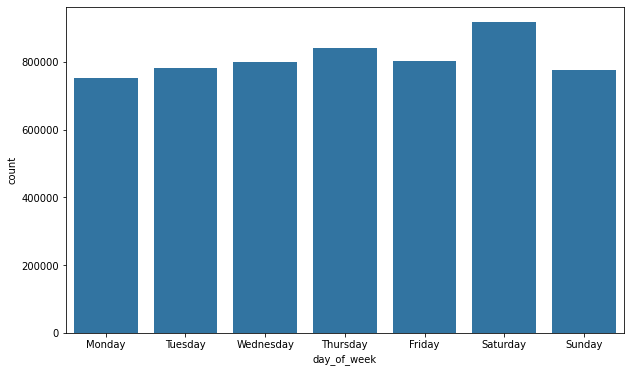

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=df, order=day_order, color='tab:blue')
plt.show()

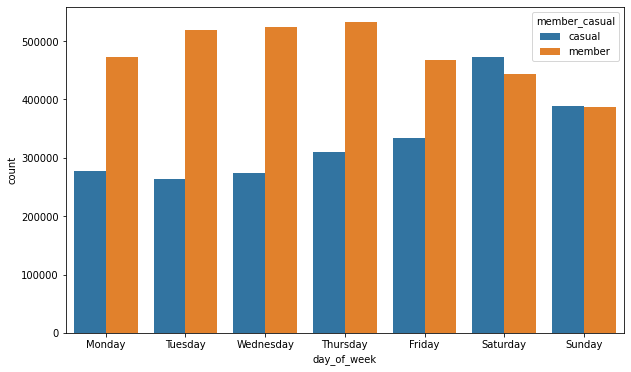

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=df, order=day_order, hue='member_casual')
plt.show()

- Jumlah perjalanan cukup konsisten selama hari kerja. Jumlah perjalanan meningkat pada hari Sabtu, di mana jumlah perjalanan mencapai puncaknya.
- Jumlah perjalanan yang dilakukan oleh pengendara anggota mendominasi selama hari kerja. Kemudian jumlah perjalanan secara bertahap menurun setelah hari Selasa, dan mencapai titik terendah pada akhir pekan.
- Jumlah perjalanan oleh pengendara kasual cukup sederhana selama hari kerja. Namun, pada akhir pekan jumlah perjalanan yang dilakukan oleh pengendara kasual meningkat cukup signifikan. Pada akhir pekan, jumlah perjalanan yang dilakukan oleh pengendara kasual bahkan lebih tinggi dibandingkan dengan pengendara anggota.

### Jumlah perjalanan per jam dalam sehari

In [ ]:
hour_ride = df.groupby(['time_hour','member_casual'], as_index=False)['ride_id'].count()
hour_ride = hour_ride.rename(columns={'ride_id': 'ride_count'})
hour_ride

,time_hour,member_casual,ride_count
0,0,casual,46474
1,0,member,36069
2,1,casual,30134
3,1,member,22163
4,2,casual,18685
5,2,member,12892
6,3,casual,11111
7,3,member,8054
8,4,casual,7618
9,4,member,8942


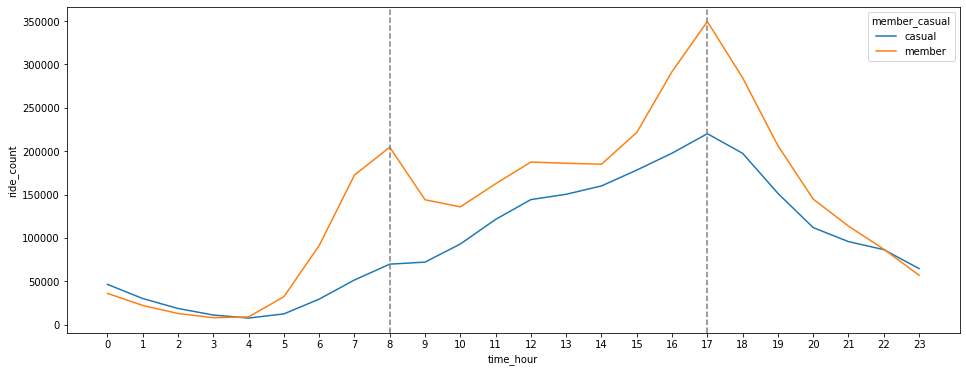

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='time_hour', y='ride_count', hue='member_casual', data=hour_ride)
x = np.arange(0, 24, 1)
plt.xticks(x)
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')
plt.show();

- Untuk pengendara anggota, jumlah pengendara mencapai puncaknya pada pukul 8.00 pagi dan 17.00 sore.
- Karena kita tahu bahwa pengendara anggota sebagian besar menyewa sepeda pada hari kerja, maka jam 8.00 dan 17.00 diperkirakan merupakan "jam sibuk", atau jam dimana orang-orang berangkat dan pulang kerja.
- Untuk pengendara biasa, jumlah pengendara tampaknya meningkat secara stabil mulai pukul 5.00, kemudian mencapai puncaknya pada pukul 17.00.

### Durasi Perjalanan Rata-Rata berdasarkan Jenis Anggota dan Hari dalam Seminggu

In [ ]:
avg_ride_duration = df.groupby(['member_casual', 'day_of_week'], as_index=False)['ride_duration'].mean()
avg_ride_duration

,member_casual,day_of_week,ride_duration
0,casual,Friday,28.046850
1,casual,Monday,29.189675
2,casual,Saturday,32.617876
3,casual,Sunday,34.060572
4,casual,Thursday,25.550397
5,casual,Tuesday,25.825316
6,casual,Wednesday,24.752198
7,member,Friday,12.531630
8,member,Monday,12.270885
9,member,Saturday,14.140955


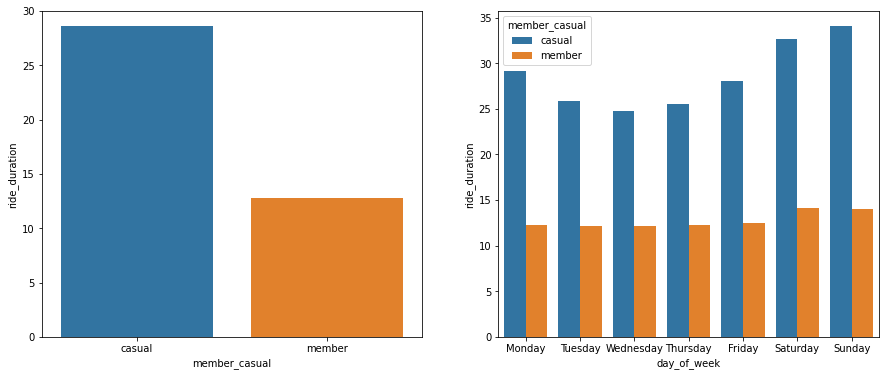

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0] = sns.barplot(ax=axes[0],
                      x='member_casual', y='ride_duration',
                      data=avg_ride_duration,
                      ci=None)
axes[1] = sns.barplot(ax=axes[1], 
                      x='day_of_week', y='ride_duration',
                      data=avg_ride_duration,
                      ci=None,
                      hue='member_casual',
                      order=day_order)
plt.show()

- Rata-rata durasi bersepeda pengendara biasa lebih tinggi daripada pengendara anggota. Rata-rata, pengendara biasa menghabiskan waktu 25 - 35 menit setiap hari untuk bersepeda. Pengendara anggota menghabiskan waktu rata-rata 12 - 15 menit setiap hari.
- Durasi bersepeda pengendara anggota konsisten di setiap hari dalam seminggu. 
- Durasi bersepeda pengendara biasa di bawah 30 menit pada hari kerja, namun durasi bersepeda meningkat menjadi 32 - 34 menit pada akhir pekan.

## Kesimpulan
---
Dengan menganalisis dataset, kami sampai pada kesimpulan yang menarik:
- Sebagian besar sepeda digunakan oleh pengendara anggota. 
- Sebagian besar pengendara lebih memilih sepeda listrik, dan bahkan lebih populer di kalangan pengendara biasa.
- Jumlah pengendara mencapai puncaknya selama musim panas (pada bulan Juni, Juli, dan Agustus). Peningkatan ini sebagian besar disebabkan oleh tingginya jumlah pengendara kasual selama musim panas.
- Pengendara member kebanyakan menyewa sepeda pada hari kerja, sedangkan pengendara kasual kebanyakan pada akhir pekan.
- Pukul 8.00 pagi dan 17.00 sore adalah "jam sibuk" bagi pengendara member. Untuk pengendara kasual, lebih tersebar dari pagi hingga sore hari, dan mencapai puncaknya pada pukul 17.00 sore.
- Pengendara kasual menghabiskan lebih banyak waktu untuk bersepeda. Rata-rata pengendara kasual menghabiskan waktu 28 menit untuk bersepeda setiap harinya, sedangkan pengendara member menghabiskan waktu 12 menit setiap harinya.
- Durasi bersepeda untuk pengendara member cenderung stagnan selama seminggu, sedangkan untuk pengendara casual terjadi peningkatan durasi bersepeda selama akhir pekan.

## Rekomendasi Bisnis
---
1. Memperkenalkan Weekend Pass atau tiket akhir pekan. Weekend Pass ditargetkan untuk pengendara kasual yang kebanyakan menyewa sepeda selama akhir pekan. Weekend Pass akan memiliki harga yang lebih murah dibandingkan annual pass atau tiket tahunan, namun hanya dapat digunakan pada hari Jumat, Sabtu, dan Minggu.

2. Buat kampanye poin reward; berikan poin reward kepada pengguna yang diakumulasikan berdasarkan durasi bersepeda. Karena durasi berkendara pengguna biasa lebih tinggi daripada pengguna member, mereka akan mendapatkan keuntungan lebih dari kampanye ini. Tawarkan diskon keanggotaan ketika mereka mencapai poin tertentu untuk mengubah mereka menjadi anggota Cyclistic.

3. Lakukan kampanye strategis selama musim panas. Mengingat jumlah pengendara sepeda mencapai puncaknya di musim panas, kita dapat melakukan kampanye dan iklan strategis untuk menjangkau lebih banyak audiens.

## Eksplorasi Masa Depan
---
Untuk mendapatkan lebih banyak wawasan tentang perilaku pengguna sepeda, lebih banyak data dapat dikumpulkan dan dianalisis. 
- Demografi pengguna, seperti pekerjaan dan usia pengendara.
- Termasuk data tentang apakah pengendara biasa menggunakan tiket sekali jalan atau tiket sehari penuh.